In [1]:
#plt.figure(figsize=(10,10))
#plt.plot(date, close)
#plt.figure(figsize=(18,10))
#plt.plot(close, c = "blue")
#plt.xticks(list(range(len(date))), date, rotation = 'vertical')
#plt.tick_params(labelsize=1)
#plt.show()

---

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#import pywt
#from statsmodels.tsa.arima_model import ARIMA

C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('btcdata.csv')
df['date'] =  pd.to_datetime(df['date'])
close = df['close'].tolist()
p_holder = len(close)
close.reverse()
close = [float(x.replace(".", "", 1)) if x.count('.') > 1 else float(x) for x in [x.replace(",", ".") for x in close]]
assert len(close) == p_holder

date = df['date'].iloc[::-1].astype('str').tolist()
assert len(close) == len(date)
assert type(close) == list, type(date) == list
#close = np.array(close)
#date = np.array(date)

#assert that there are no unique bitcoin values
#assert np.sum((close == set(close))) == 0 

In [6]:
# (Pt -Pt-1)/Pt-1 *100
close_return = []
for i in range(len(close) - 1):
    close_return.append((close[i+1] - close[i])/close[i] * 100)

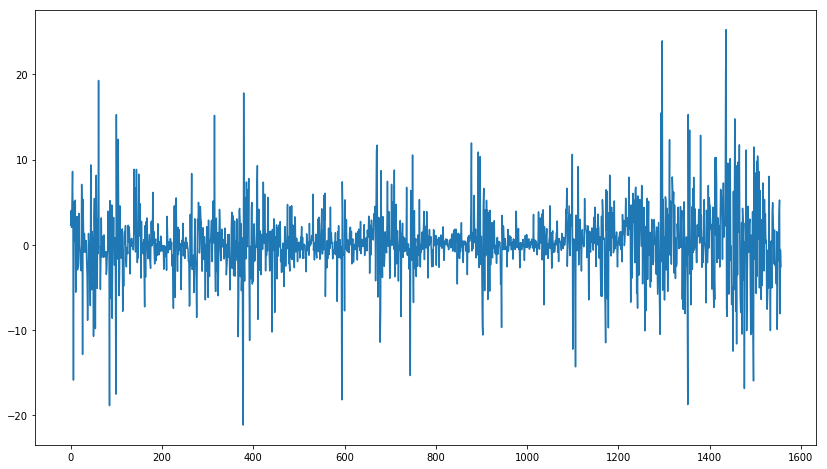

In [8]:
plt.figure(figsize= (14,8))
plt.plot(close_return)
plt.show()

In [14]:
df = pd.Series(data = close_return, )

['2014-01-01',
 '2014-01-02',
 '2014-01-03',
 '2014-01-04',
 '2014-01-05',
 '2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10',
 '2014-01-11',
 '2014-01-12',
 '2014-01-13',
 '2014-01-14',
 '2014-01-15',
 '2014-01-16',
 '2014-01-17',
 '2014-01-18',
 '2014-01-19',
 '2014-01-20',
 '2014-01-21',
 '2014-01-22',
 '2014-01-23',
 '2014-01-24',
 '2014-01-25',
 '2014-01-26',
 '2014-01-27',
 '2014-01-28',
 '2014-01-29',
 '2014-01-30',
 '2014-01-31',
 '2014-02-01',
 '2014-02-02',
 '2014-02-03',
 '2014-02-04',
 '2014-02-05',
 '2014-02-06',
 '2014-02-07',
 '2014-02-08',
 '2014-02-09',
 '2014-02-10',
 '2014-02-11',
 '2014-02-12',
 '2014-02-13',
 '2014-02-14',
 '2014-02-15',
 '2014-02-16',
 '2014-02-17',
 '2014-02-18',
 '2014-02-19',
 '2014-02-20',
 '2014-02-21',
 '2014-02-22',
 '2014-02-23',
 '2014-02-24',
 '2014-02-25',
 '2014-02-26',
 '2014-02-27',
 '2014-02-28',
 '2014-03-01',
 '2014-03-02',
 '2014-03-03',
 '2014-03-04',
 '2014-03-05',
 '2014-03-06',
 '2014-03-07',
 '2014-03-

In [8]:
print(len(close), len(close_return))

1558 1557


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
close_return = scaler.fit_transform(np.array(close_return).reshape(-1,1))

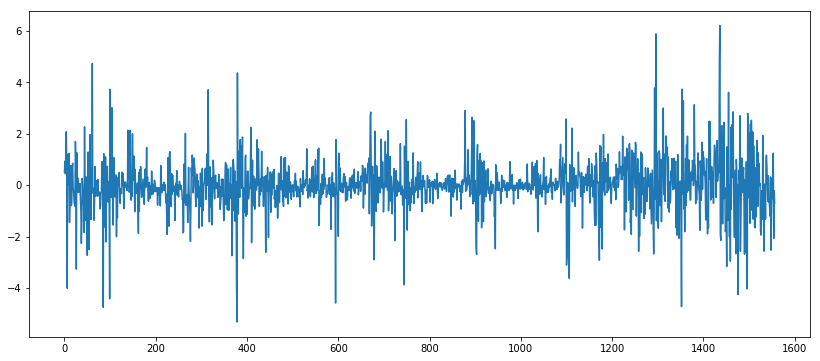

In [11]:
plt.figure(figsize= (14,6))
plt.plot(close_return)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features = close_return[:-1]
target = close_return[1:]

In [14]:
target = target.reshape(1556,)

In [15]:
#x_hold, x_test, y_hold, y_test = train_test_split(features,target, test_size = 0.1, random_state = 0)
#x_train, x_val, y_trian, y_val = train_test_split(x_hold, y_hold, test_size = 0.1, random_state = 0)

In [16]:
"""
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.optimizers import Adam, Adamax, Nadam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Bidirectional
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.models import model_from_json
"""

'\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import LSTM\nfrom keras.layers import GRU\nfrom keras.layers.embeddings import Embedding\nfrom keras.preprocessing import sequence\nfrom keras.layers import Dropout\nfrom keras.optimizers import Adam, Adamax, Nadam\nfrom keras.layers.convolutional import Conv1D\nfrom keras.layers.convolutional import MaxPooling1D\nfrom keras.layers.advanced_activations import LeakyReLU\nfrom keras.layers import Bidirectional\nfrom keras import regularizers\nfrom keras.callbacks import ModelCheckpoint, EarlyStopping\nfrom keras.models import load_model\nfrom keras.models import model_from_json\n'

In [17]:
"""
model = Sequential()
model.add(LSTM(100, input_shape = (1,1556)))
"""

'\nmodel = Sequential()\nmodel.add(LSTM(100, input_shape = (1,1556)))\n'

In [18]:
def check_stationarity(array1):
    
    #   input_ad = array1
    #except:
    input_ad = array1.reshape(array1.shape[0],)
        
    
    
    print(input_ad.shape)
    result = adfuller(input_ad)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
    if result[0] < result[4]['1%']:
        print('Data is stationary as fuck')
    elif result[0] < result[4]['5%']:
        print('Date is kinda stationary')
    else:
        print('You done fucked up son')

In [19]:
check_stationarity(close_return)

(1557,)
ADF Statistic: -22.503391
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Data is stationary as fuck


In [20]:
print(features.shape, target.shape)

(1556, 1) (1556,)


In [22]:
import pywt

In [23]:
father, mother = pywt.dwt(close_return, 'haar')22.503391

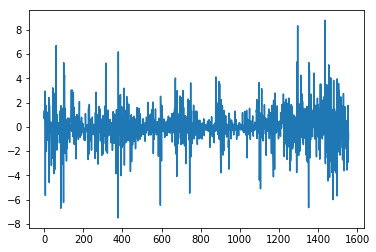

In [26]:
plt.plot(father)
plt.show()

In [31]:
import seaborn as sns

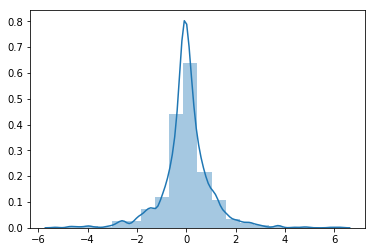

In [35]:
sns.distplot(close_return, bins = 20)
plt.show()

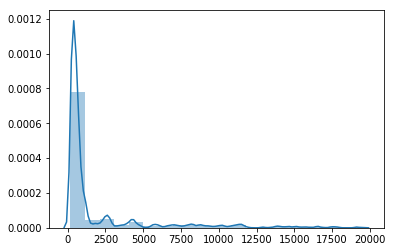

In [34]:
sns.distplot(close, bins = 20)
plt.show()

---

# SVR

In [2]:
from sklearn.svm import SVR

In [3]:
reg = SVR()